In [92]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import os

In [22]:
data_conso = pd.read_csv("/home/loick/conso-quot-moy.csv")
data_conso

,Date,Code région,Nom de la région,Conso_moy_quot_MW
0,01/01/19,44,Grand Est,6184.978723
1,01/02/19,44,Grand Est,6839.875000
2,01/03/19,44,Grand Est,6587.770833
3,01/04/19,44,Grand Est,6446.062500
4,01/05/19,44,Grand Est,6965.229167
...,...,...,...,...
360,12/27/19,44,Grand Est,5573.520833
361,12/28/19,44,Grand Est,6296.145833
362,12/29/19,44,Grand Est,6624.416667
363,12/30/19,44,Grand Est,6608.979167


In [34]:
data_temp = pd.read_csv("/home/loick/temp-quot-reg.csv")
data_temp

,Date,Code INSEE région,Région,Tmoy_?C
0,2019-01-01,44,Grand Est,11.21
1,2019-01-02,44,Grand Est,10.86
2,2019-01-03,44,Grand Est,10.49
3,2019-01-04,44,Grand Est,12.21
4,2019-01-05,44,Grand Est,9.89
...,...,...,...,...
360,2019-12-27,44,Grand Est,4.36
361,2019-12-28,44,Grand Est,0.33
362,2019-12-29,44,Grand Est,5.31
363,2019-12-30,44,Grand Est,-1.94


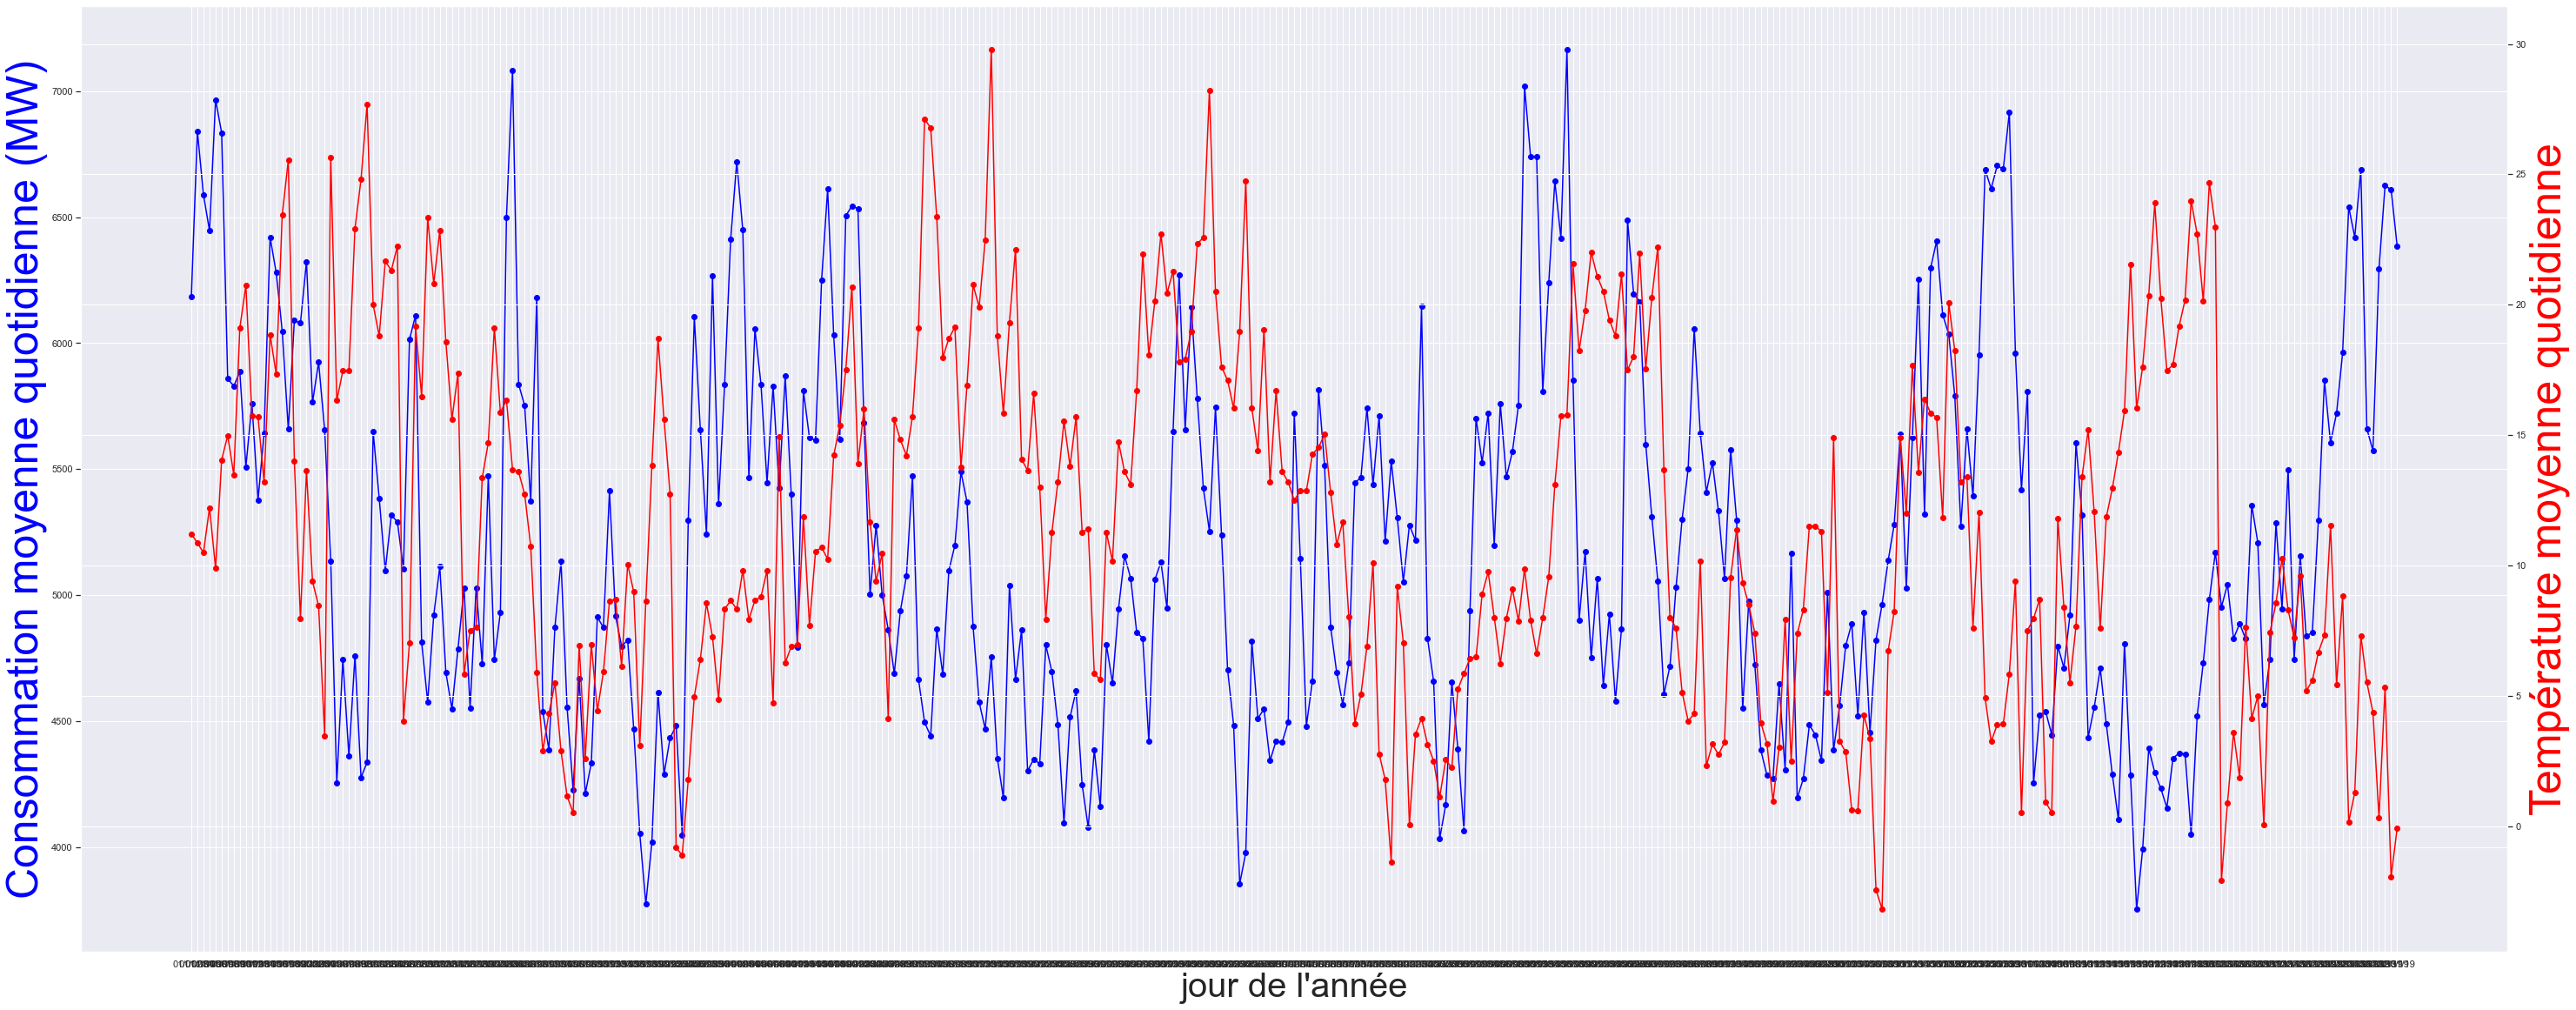

In [94]:
#create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(50,20))
# make a plot
ax.plot(data_conso.Date,
        data_conso.Conso_moy_quot_MW,
        color="blue", 
        marker="o")
# set x-axis label
ax.set_xlabel("jour de l'année", fontsize = 40)
# set y-axis label
ax.set_ylabel("Consommation moyenne quotidienne (MW)",
              color="blue",
              fontsize=50)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data_conso.Date, data_temp["Tmoy_?C"],color="red",marker="o")
ax2.set_ylabel("Température moyenne quotidienne",color="red",fontsize=50)
plt.show()

In [86]:
data_conso.describe()

,Code région,Conso_moy_quot_MW
count,365.0,365.000000
mean,44.0,5199.750512
std,0.0,738.862191
min,44.0,3755.333333
25%,44.0,4615.791667
50%,44.0,5067.833333
75%,44.0,5702.395833
max,44.0,7166.020833


In [83]:
data_temp.describe()

,Code INSEE région,Tmoy_?C
count,365.0,365.000000
mean,44.0,11.662301
std,0.0,6.850334
min,44.0,-3.180000
25%,44.0,6.480000
50%,44.0,11.380000
75%,44.0,16.910000
max,44.0,29.800000


In [89]:
x = sm.add_constant(x1)

results = sm.OLS(y,x).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Conso_moy_quot_MW   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     2.850
Date:                Sun, 10 Jul 2022   Prob (F-statistic):             0.0922
Time:                        10:30:50   Log-Likelihood:                -2926.9
No. Observations:                 365   AIC:                             5858.
Df Residuals:                     363   BIC:                             5866.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5310.7689     76.243     69.656      0.000    5160.836    5460.702
Tmoy_?C       -9.5194      5.639     -1.688      0.092     -20.609       1.570
==============================================================================
Omnibus:                       20.615   Durbin-Watson:                   0.453
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.940
Skew:                           0.469   Prob(JB):                     0.000127
Kurtosis:                       2.453   Cond. No.                         26.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Interprétation de la régression ; 
## Testons la pertinence du coefficient de la température à partir de sa p-value : 
## H0 : a = 0
## H1 : a =/=0
## Critère de décision : si sa p-value < 0.05, on peut rejeter l'hypothèse nulle. Or, ici, 0.092 > 0.05 donc on ne peut pas rejeter l'hypothèse nulle. La température n'a pas eu d'incidence sur la consommation en 2019.

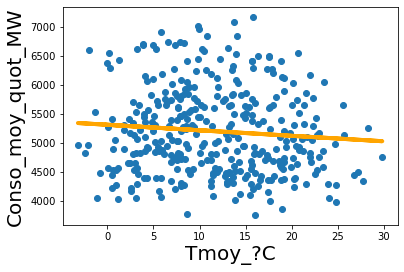

In [90]:
yhat = -9.5194*x1 + 5310.7689
# Plot the regression line against the independent variable (SAT)
x1 = data_temp['Tmoy_?C']
y = data_conso['Conso_moy_quot_MW']
plt.scatter(x1,y)
plt.xlabel('Tmoy_?C', fontsize = 20)
plt.ylabel('Conso_moy_quot_MW', fontsize = 20)
fig = plt.plot(x1,yhat, lw=4, c='orange', label ='regression line')

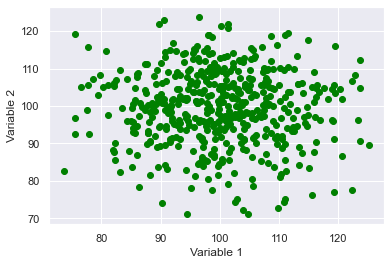

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.4480
Date:                Sun, 10 Jul 2022   Prob (F-statistic):              0.504
Time:                        10:54:41   Log-Likelihood:                -1858.0
No. Observations:                 500   AIC:                             3720.
Df Residuals:                     498   BIC:                             3728.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        102.5573      4.540     22.591      0.000      93.638     111.477
x1            -0.0303      0.045     -0.669      0.504      -0.119       0.059
==============================================================================
Omnibus:                        6.404   Durbin-Watson:                   1.980
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                6.545
Skew:                          -0.275   Prob(JB):                       0.0379
Kurtosis:                       2.897   Cond. No.                     1.02e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.02e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [96]:
import pylab
import random

sampleSize = 500

## To get data suitable for displaying on a scatterplot,
## generate normal random variates on both x and y dimensions.
## Note that there's no relationship between the two variables.

x1 = []
y = []

for i in range(sampleSize):
    x1.append(random.normalvariate(100,10))
    y.append(random.normalvariate(100,10))

pylab.scatter(x1,y,c="green")
pylab.xlabel("Variable 1")
pylab.ylabel("Variable 2")
pylab.savefig("scatter1.png")
pylab.show()

x = sm.add_constant(x1)

results = sm.OLS(y,x).fit()

results.summary()

## Pas de relation apparente entre la consommation et la température sur ce jeu de données

# Allons plus loin : on segmente les données en deux : hiver et été, et on recommence le processus

In [100]:
data_conso_ete = pd.read_csv("/home/loick/conso-quot-moy-ete.csv")
data_conso_ete

,Date,Code région,Nom de la région,C_moy
0,05/01/19,44,Grand Est,4664.812500
1,05/02/19,44,Grand Est,4495.916667
2,05/03/19,44,Grand Est,4441.062500
3,05/04/19,44,Grand Est,4866.020833
4,05/05/19,44,Grand Est,4685.895833
...,...,...,...,...
148,09/26/19,44,Grand Est,4446.083333
149,09/27/19,44,Grand Est,4343.479167
150,09/28/19,44,Grand Est,5010.000000
151,09/29/19,44,Grand Est,4385.187500


In [99]:
data_temp_ete = pd.read_csv("/home/loick/temp-quot-reg-ete.csv")
data_temp_ete

,Date,Code région,Nom de la région,T_moy
0,2019-05-01,44,Grand Est,19.12
1,2019-05-02,44,Grand Est,27.13
2,2019-05-03,44,Grand Est,26.77
3,2019-05-04,44,Grand Est,23.39
4,2019-05-05,44,Grand Est,17.97
...,...,...,...,...
148,2019-09-26,44,Grand Est,11.51
149,2019-09-27,44,Grand Est,11.29
150,2019-09-28,44,Grand Est,5.13
151,2019-09-29,44,Grand Est,14.89


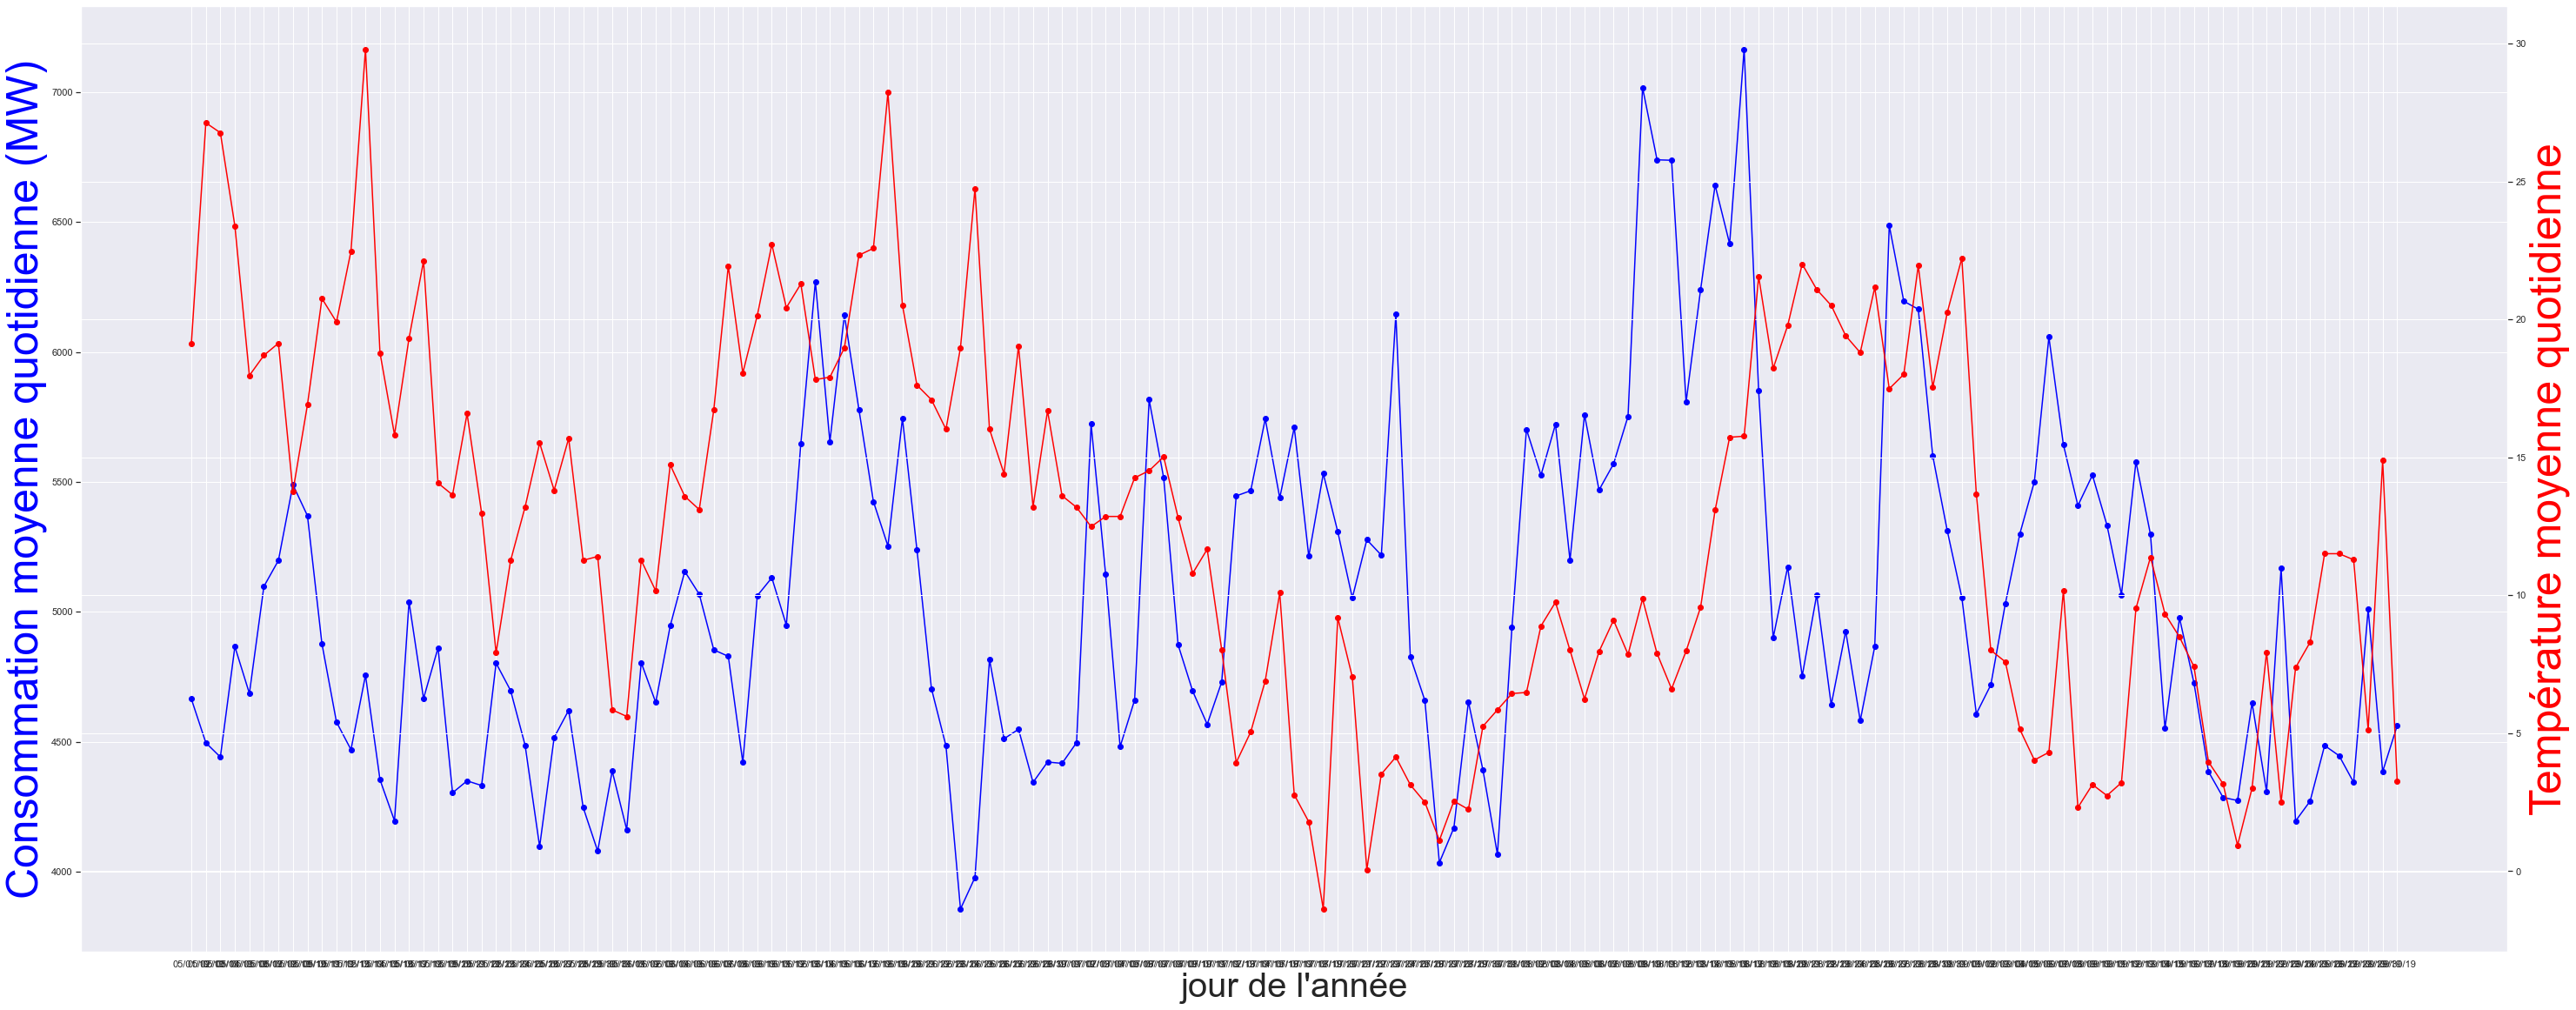

In [101]:
#create figure and axis objects with subplots()
fig,ax = plt.subplots(figsize=(50,20))
# make a plot
ax.plot(data_conso_ete.Date,
        data_conso_ete.C_moy,
        color="blue", 
        marker="o")
# set x-axis label
ax.set_xlabel("jour de l'année", fontsize = 40)
# set y-axis label
ax.set_ylabel("Consommation moyenne quotidienne (MW)",
              color="blue",
              fontsize=50)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(data_conso_ete.Date, data_temp_ete["T_moy"],color="red",marker="o")
ax2.set_ylabel("Température moyenne quotidienne",color="red",fontsize=50)
plt.show()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  C_moy   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.2411
Date:                Sun, 10 Jul 2022   Prob (F-statistic):              0.624
Time:                        11:17:35   Log-Likelihood:                -1210.6
No. Observations:                 153   AIC:                             2425.
Df Residuals:                     151   BIC:                             2431.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5090.9631    113.353     44.912      0.000    4867.000    5314.926
T_moy         -3.8696      7.880     -0.491      0.624     -19.439      11.700
==============================================================================
Omnibus:                       15.142   Durbin-Watson:                   0.518
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.624
Skew:                           0.786   Prob(JB):                     0.000246
Kurtosis:                       3.369   Cond. No.                         30.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

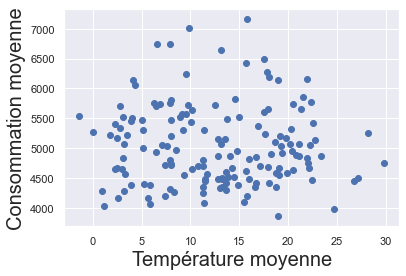

In [104]:
x1 = data_temp_ete['T_moy']
y = data_conso_ete['C_moy']
plt.scatter(x1,y)
plt.xlabel('Température moyenne', fontsize = 20)
plt.ylabel('Consommation moyenne', fontsize = 20)

x = sm.add_constant(x1)

results = sm.OLS(y,x).fit()

results.summary()

## Pas de relation linéaire entre température et consommation